In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

# Reading the datasets

## Reading the global dataset

In [3]:
df = pd.read_csv("../../../../data/interim/Global-Dataset/global_dataset.csv")

<IPython.core.display.Javascript object>

## Reading the local dataset for plant B

In [4]:
df_b = pd.read_csv("../../../../data/processed/206/b.csv")

<IPython.core.display.Javascript object>

# Preprocessing of Global Dataset

### Removing the plant to be fine-tuned

In [5]:
df.shape

(66111, 48)

<IPython.core.display.Javascript object>

In [6]:
df = df[df["Factory_Plant"] != "206_B"].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df.shape

(64948, 48)

<IPython.core.display.Javascript object>

### Removing non-matching columns between the datasets

In [8]:
df = df[df_b.columns.to_list() + ["Factory_Plant"]]

<IPython.core.display.Javascript object>

In [9]:
df.shape

(64948, 16)

<IPython.core.display.Javascript object>

In [10]:
df_b

,Date,MgO,SO3,Loss on Ignition,Insoluble Residue,Blaine,#200,#325,Initial setting time,Final setting time,CS1,CS3,CS7,CS28,Cement_Type
0,2020-01-02,4.11,3.80,3.30,27.24,6038.0,4.74,17.80,130.0,205.0,12.4950,25.1425,34.5550,39.2875,CPIV32RS
1,2020-01-02,5.18,3.93,2.40,3.74,4025.0,0.55,2.60,130.0,200.0,24.7100,34.7300,38.5875,48.0475,CPVARI
2,2020-01-04,5.20,3.90,2.13,2.86,3938.0,0.11,2.80,135.0,210.0,27.7500,35.2375,41.7875,49.3350,CPVARI
3,2020-01-07,4.95,3.84,2.73,26.26,5721.0,6.81,20.50,130.0,205.0,12.4075,23.2500,35.9850,41.8425,CPIV32RS
4,2020-01-07,5.09,4.07,2.19,4.44,4007.0,0.16,1.80,135.0,205.0,25.4925,33.7000,40.6100,47.3150,CPVARI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,2023-02-22,4.32,2.98,4.23,31.47,6607.0,7.07,19.73,140.0,205.0,10.2075,27.5475,35.4800,39.4950,CPIV32RS
1165,2023-02-23,4.31,3.53,4.73,30.81,6627.0,6.99,20.26,140.0,205.0,11.4125,26.1300,36.5325,41.3350,CPIV32RS
1166,2023-02-25,4.33,3.43,4.74,30.48,6578.0,6.37,20.07,120.0,185.0,13.4925,28.4125,38.1825,45.6275,CPIV32RS
1167,2023-02-28,4.42,3.19,4.91,30.16,6512.0,4.60,13.00,150.0,215.0,10.7850,25.8050,35.9750,40.4175,CPIV32RS


<IPython.core.display.Javascript object>

## Removing missing features

In [11]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
CS1,51.187104
Insoluble Residue,27.357270
#325,12.157418
CS3,6.232678
Initial setting time,4.308062
#200,4.215680
MgO,3.094784
Final setting time,1.213278
SO3,0.999261
Loss on Ignition,0.774466


<IPython.core.display.Javascript object>

<Axes: >

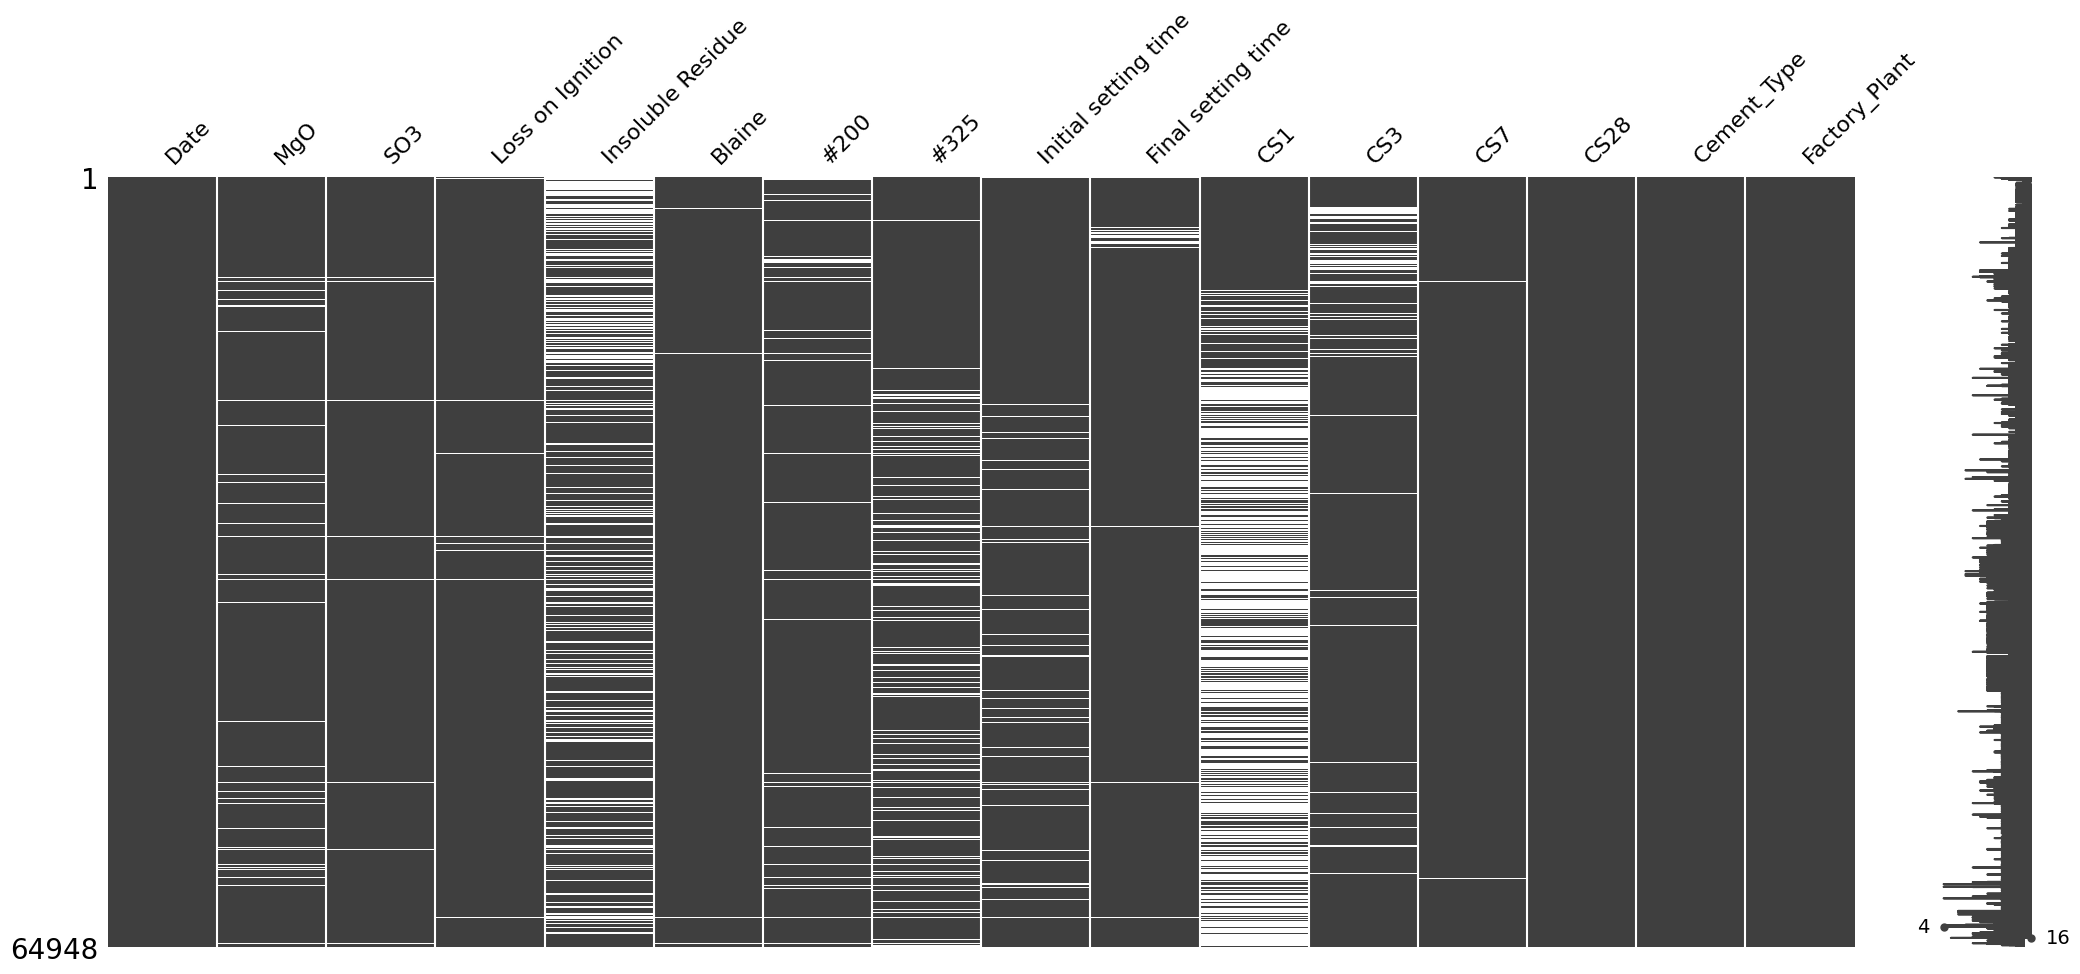

<IPython.core.display.Javascript object>

In [12]:
msno.matrix(df)

<Axes: >

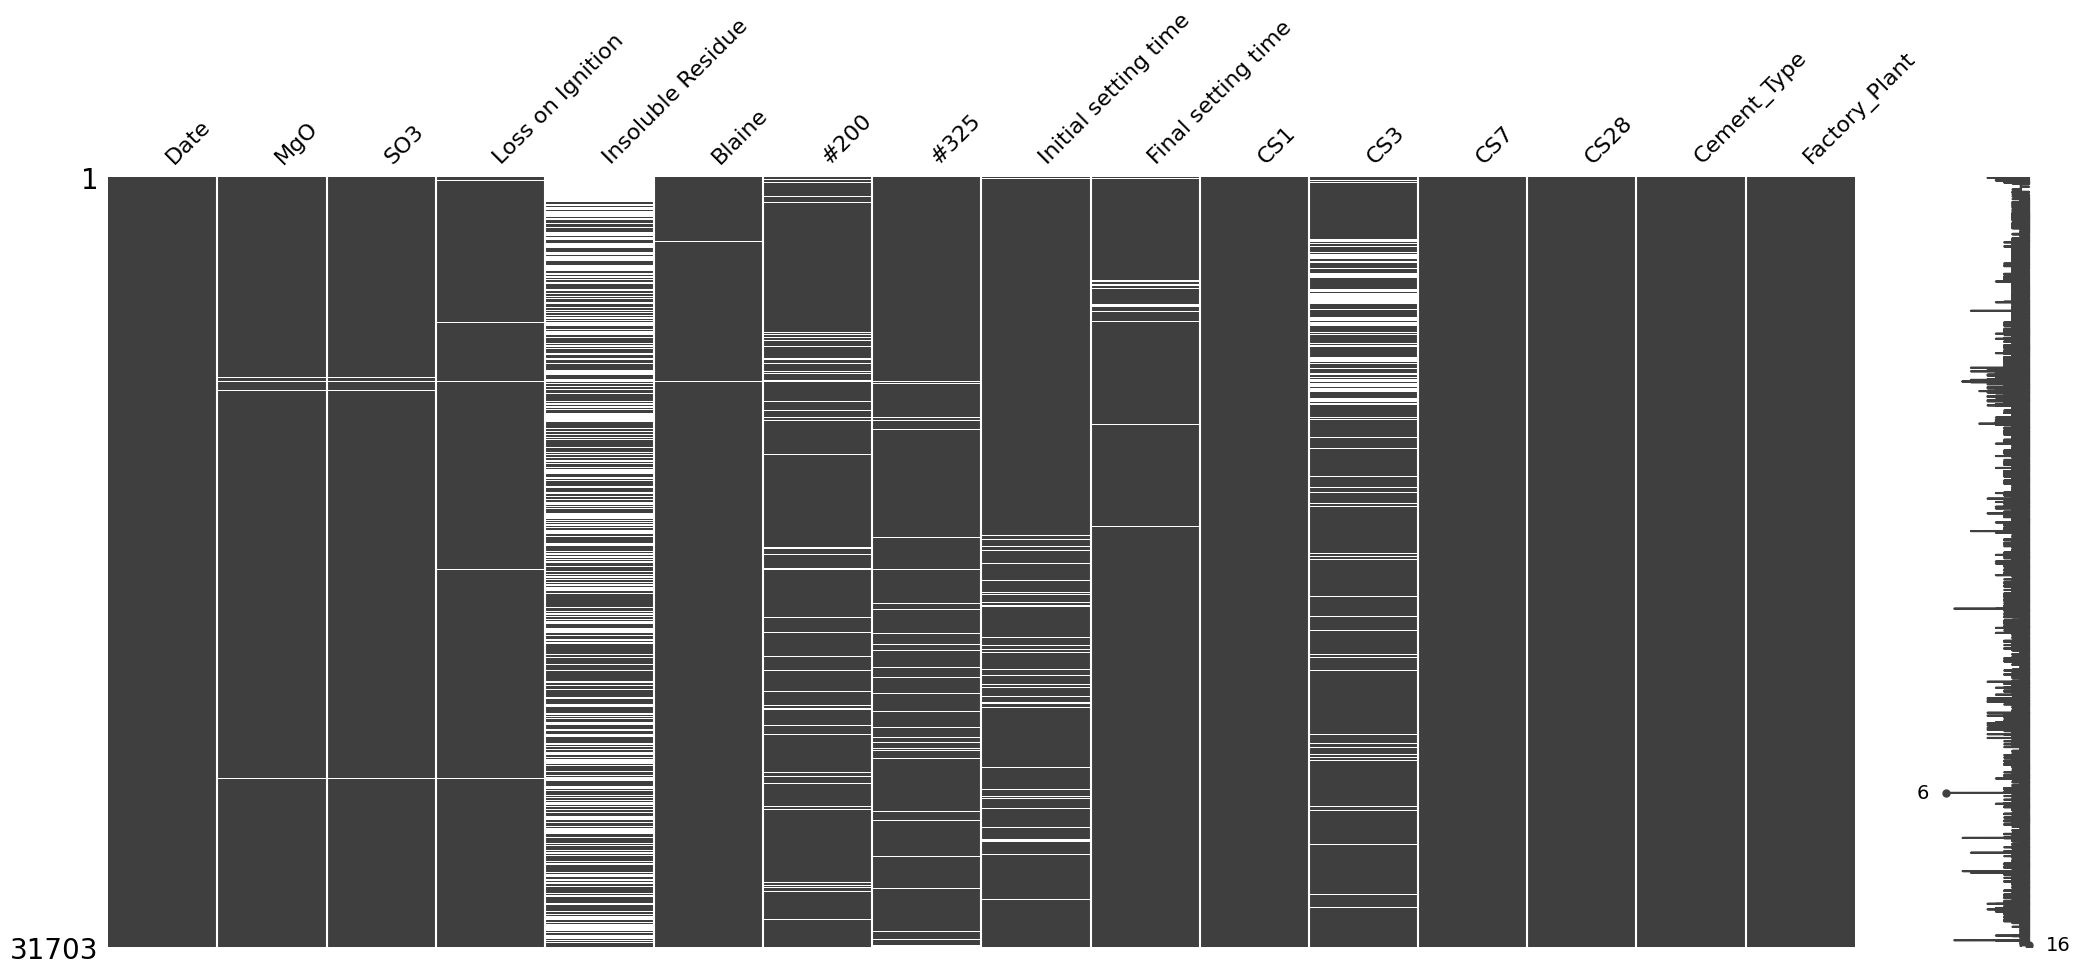

<IPython.core.display.Javascript object>

In [13]:
msno.matrix(df.loc[(df["CS1"].notna() == True)])

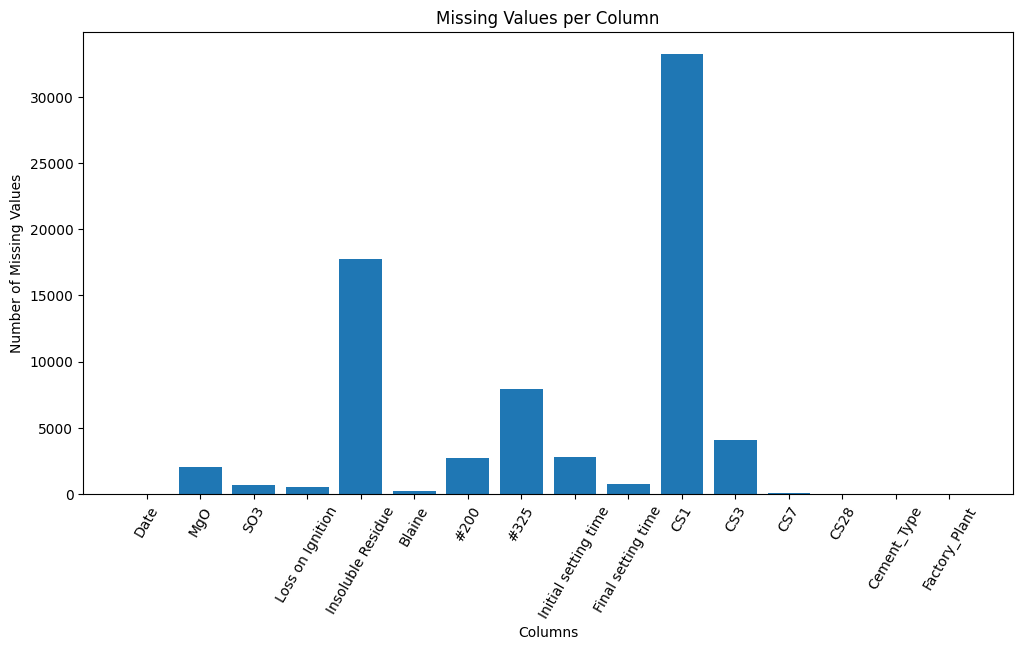

<IPython.core.display.Javascript object>

In [14]:
missing_counts = df.isnull().sum()
plt.figure(figsize=(12, 6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=60)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.show()

### Removing features with many zeros when applicable

In [15]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for Global Dataset")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for Global Dataset")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%) for Global Dataset
#200,14.177496
Insoluble Residue,0.645131
#325,0.349510
Loss on Ignition,0.101620
Blaine,0.093921
Initial setting time,0.084683
Final setting time,0.083143
SO3,0.063127
MgO,0.021556
CS7,0.004619


<IPython.core.display.Javascript object>

### Drop rows where the target variable is null

In [16]:
df = df[df["CS28"].notna()]

<IPython.core.display.Javascript object>

### Dropping rows where the target variable is zero

In [17]:
df = df[~df["CS28"].eq(0)]

<IPython.core.display.Javascript object>

### Dropping rows where any other variable has a zero value - except #200

In [18]:
for col in df.columns:
    if col != "#200":
        df = df[~df[col].eq(0)]

<IPython.core.display.Javascript object>

In [19]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
CS1,51.098704
Insoluble Residue,27.462142
#325,12.259634
CS3,6.305267
Initial setting time,4.340232
#200,4.202991
MgO,3.072316
Final setting time,1.202414
SO3,1.004351
Loss on Ignition,0.736108


<IPython.core.display.Javascript object>

<Axes: >

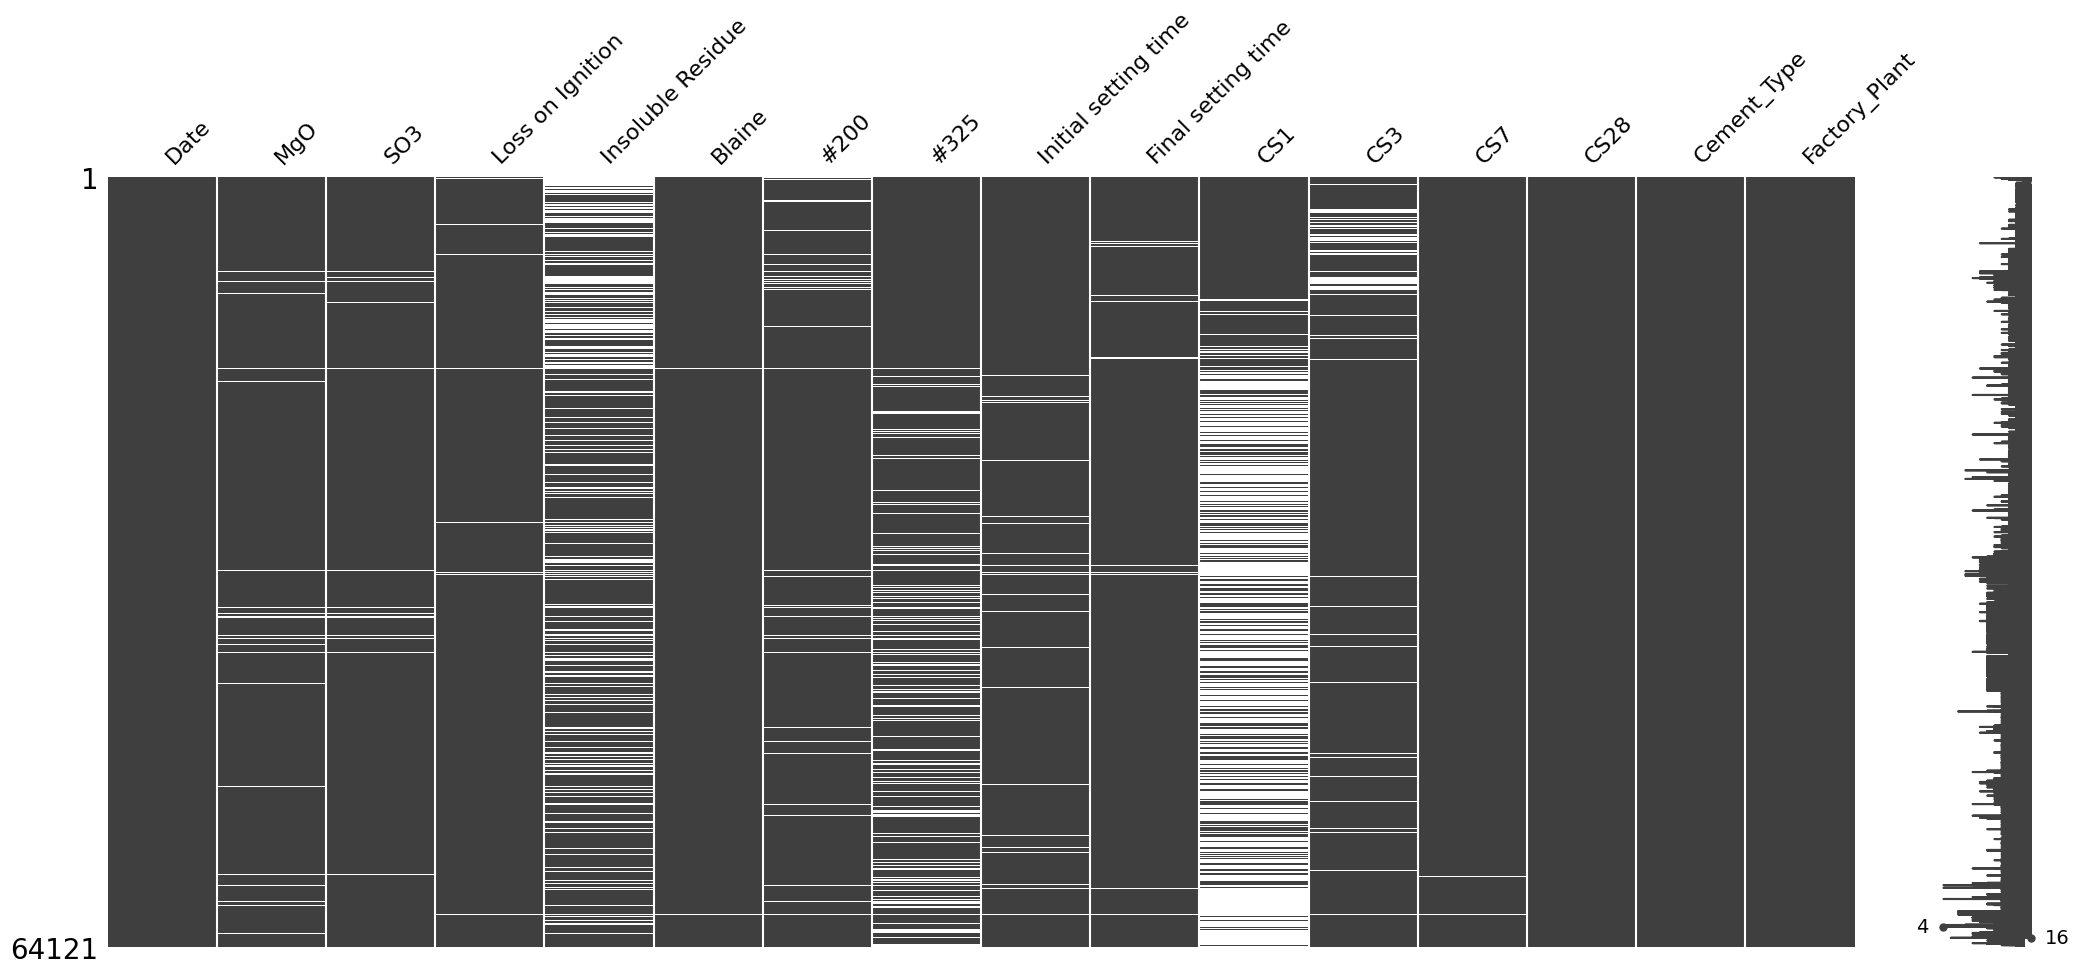

<IPython.core.display.Javascript object>

In [20]:
msno.matrix(df)

In [21]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for Global Dataset")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for Global Dataset")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%) for Global Dataset
#200,13.998534
MgO,0.000000
SO3,0.000000
Loss on Ignition,0.000000
Insoluble Residue,0.000000
Blaine,0.000000
#325,0.000000
Initial setting time,0.000000
Final setting time,0.000000
CS1,0.000000


<IPython.core.display.Javascript object>

In [22]:
df.shape

(64121, 16)

<IPython.core.display.Javascript object>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64121 entries, 0 to 64947
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  64121 non-null  object 
 1   MgO                   62151 non-null  float64
 2   SO3                   63477 non-null  float64
 3   Loss on Ignition      63649 non-null  float64
 4   Insoluble Residue     46512 non-null  float64
 5   Blaine                63925 non-null  float64
 6   #200                  61426 non-null  float64
 7   #325                  56260 non-null  float64
 8   Initial setting time  61338 non-null  float64
 9   Final setting time    63350 non-null  float64
 10  CS1                   31356 non-null  float64
 11  CS3                   60078 non-null  float64
 12  CS7                   64034 non-null  float64
 13  CS28                  64121 non-null  float64
 14  Cement_Type           64121 non-null  object 
 15  Factory_Plant         64

<IPython.core.display.Javascript object>

### Sort the dataset by date

In [24]:
df["Date"] = pd.to_datetime(df["Date"])

<IPython.core.display.Javascript object>

In [25]:
df = df.sort_values(by="Date")

<IPython.core.display.Javascript object>

## Saving the dataset

<h3>Saving for feature engineering</h3>

In [26]:
df.to_csv("../../../../data/interim/206/global_b.csv", index=False)

<IPython.core.display.Javascript object>